In [1]:
%matplotlib inline
from matplotlib.pylab import plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import pandas as pd
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [6]:
from statsmodels.tsa import stattools

In [20]:
f = pd.read_csv('data/yahoo_stock.csv')

# Time series relate to themselves

...First, let's look at the auto correlation function

### Let's start with white noise

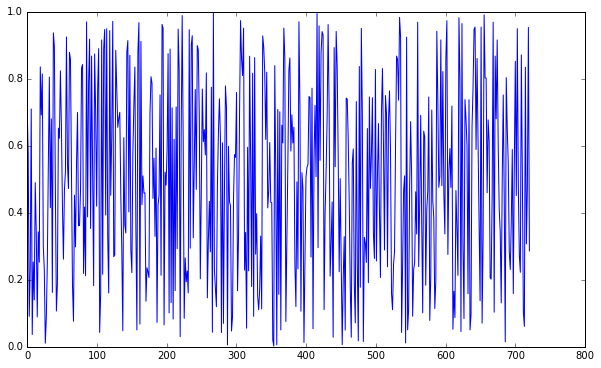

In [21]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
result_curve =  noise
plt.plot(grid, result_curve)

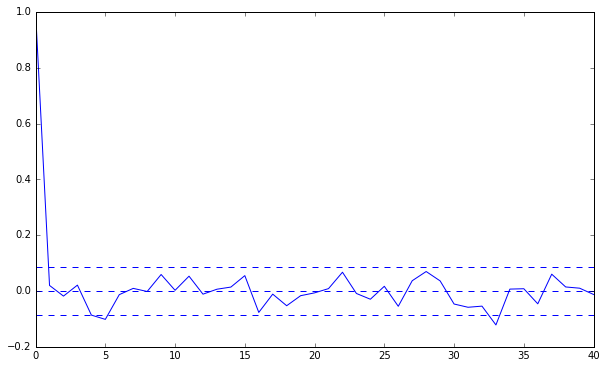

In [22]:
acf_result = stattools.acf(result_curve)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

### How about a periodic function?

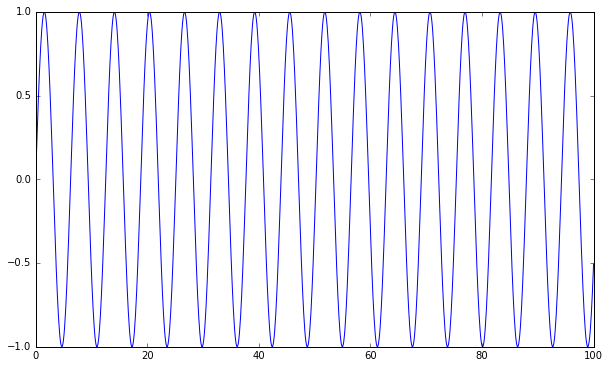

In [23]:
grid = np.linspace(0, 100, 1000)
sin5 = np.sin(grid)
result_curve = sin5 
plt.plot(grid, result_curve)

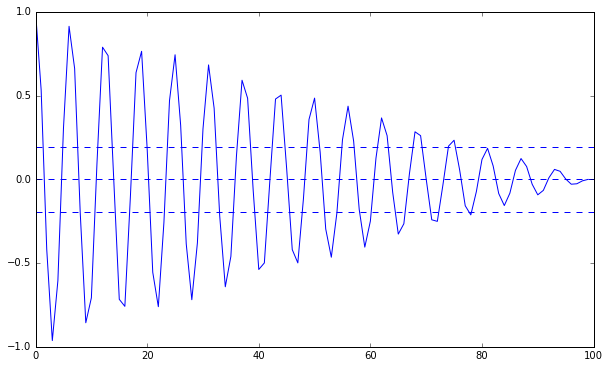

In [24]:
grid = np.linspace(0, 100, 100)
sin5 = np.sin(grid)
result_curve = sin5 

acf_result = stattools.acf(result_curve, nlags = 100)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

### Now let's look at a real example

In [35]:
f.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,12.17,12.85,12.12,12.85,12.85,9514600
1,2009-01-05,12.72,13.01,12.39,12.86,12.86,11989900
2,2009-01-06,12.96,13.24,12.88,13.00,13.00,10056000
3,2009-01-07,12.71,13.16,12.45,12.71,12.71,24995900
4,2009-01-08,12.37,13.07,12.31,13.07,13.07,14355000


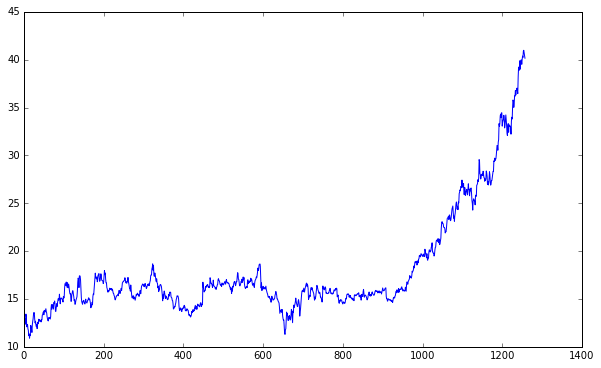

In [40]:
plt.plot(f['Open'])

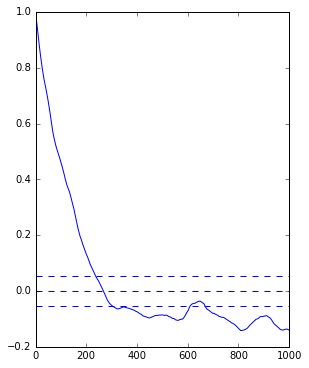

In [41]:
acf_result = stattools.acf(f['Open'], nlags = 1000)
plt.subplot(121) 
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(f['Open'])),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(f['Open'])),linestyle='--')

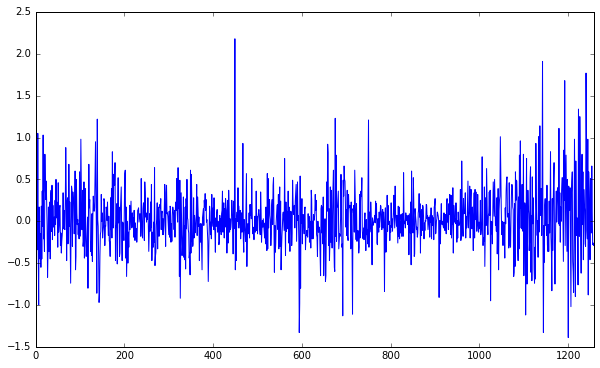

In [38]:
diff_f = f.Open - f.Open.shift()
diff_f.plot()
diff_f.dropna(inplace = True)

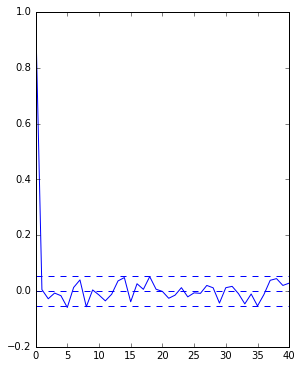

In [39]:
acf_result = stattools.acf(diff_f)
plt.subplot(121) 
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(diff_f)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(diff_f)),linestyle='--')

### You're probably starting to wonder whether this is actually useful...Here's a better real-world example

In [28]:
air_passengers = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)

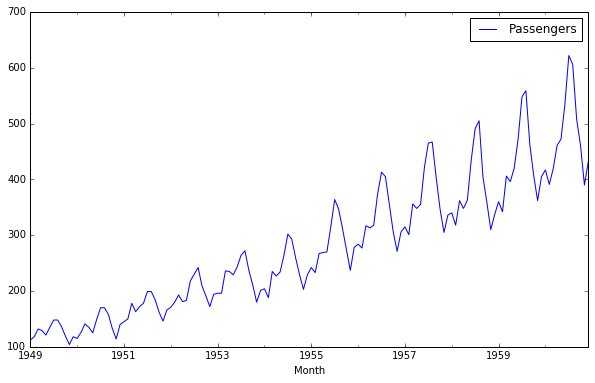

In [29]:
air_passengers.plot()

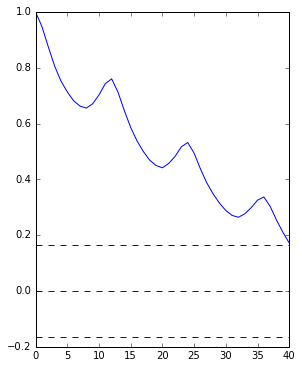

In [42]:
acf_result = stattools.acf(air_passengers)
plt.subplot(121) 
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(air_passengers)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(air_passengers)),linestyle='--')

### Hmmm, that looks meaningful but worrying

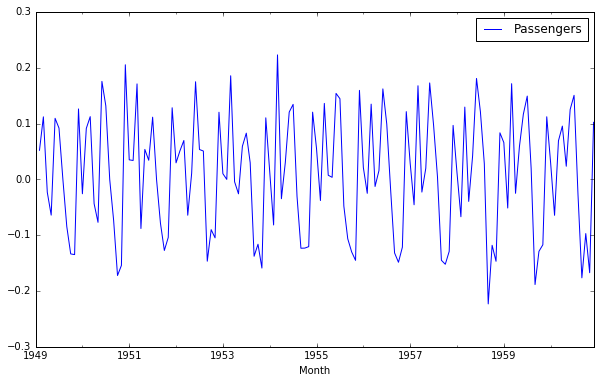

In [43]:
log_air_passengers = np.log(air_passengers)
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.plot()

In [44]:
log_air_passengers_diff = log_air_passengers_diff.Passengers
log_air_passengers_diff.dropna(inplace = True)

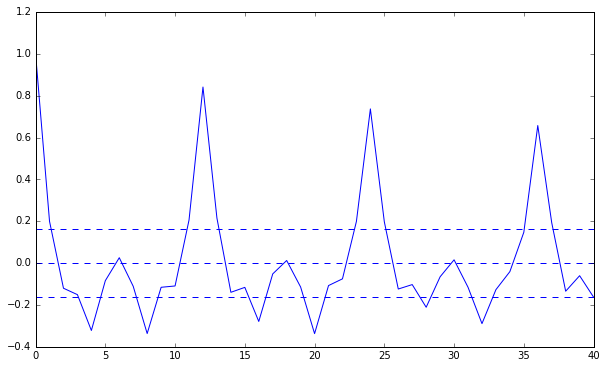

In [45]:
acf_result = stattools.acf(log_air_passengers_diff)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')